In [12]:
from google.colab import files
uploaded = files.upload()


Saving Cleaned_Solar_Energy_Dataset__Outliers_Removed_.csv to Cleaned_Solar_Energy_Dataset__Outliers_Removed_ (2).csv


In [14]:
import pandas as pd
df = pd.read_csv("Cleaned_Solar_Energy_Dataset__Outliers_Removed_.csv")

In [24]:
df.head()

,Unnamed: 0,Year,Household_Size,House_Area_sqft,Monthly_Consumption_kWh,Solar_Generation_kWh,Energy_Sent_to_Grid_kWh,Subsidy_Amount,Final_Bill_Before_Savings,Final_Bill_After_Savings,...,Electricity_Rate_per_kWh,Net_Metering_Credit_per_kWh,Govt_Solar_Subsidy_%,CO2_Emissions_Reduced_kg,Total_Annual_Emissions_Reduced,Solar_Setup_Cost,Break_Even_Years,House_Ownership_Type,Energy_Usage_Category,Household_Income
0,0,2021,6,2724,1458,1565.519191,107.519191,3779,10206,5996.923238,...,7,4,23,782.759595,9393.115143,294192,69.89,Owned,High,1102633
1,1,2018,4,1400,1144,1266.087028,122.087028,1012,8008,6507.651886,...,7,4,18,633.043514,7596.522171,117600,78.38,Owned,Medium,1105949
2,2,2022,3,1242,678,793.006159,115.006159,4053,4746,232.975364,...,7,4,26,396.503080,4758.036955,126684,28.07,Owned,Medium,1429759
3,4,2021,4,1608,1088,876.993363,0.000000,2944,7616,4672.000000,...,7,4,12,438.496681,5261.960177,131856,44.79,Owned,Medium,1078968
4,5,2024,3,1488,765,808.580433,43.580433,2578,5355,2602.678266,...,7,4,13,404.290217,4851.482600,124992,45.41,Owned,Medium,1763067


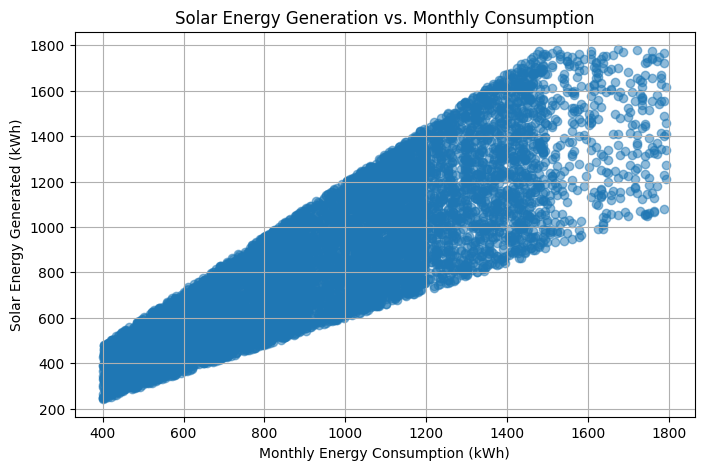

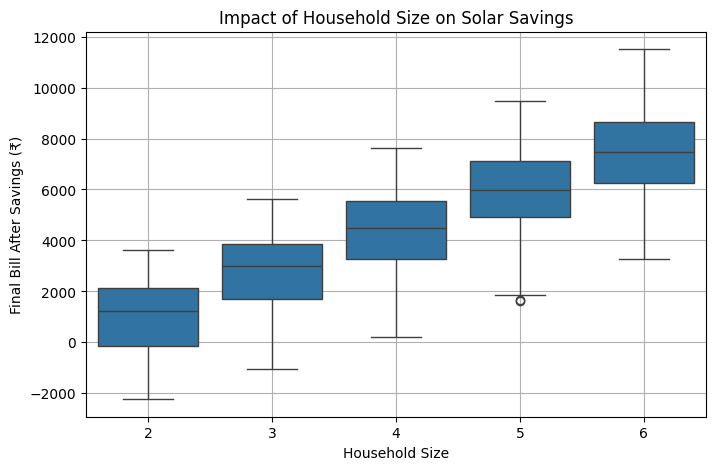

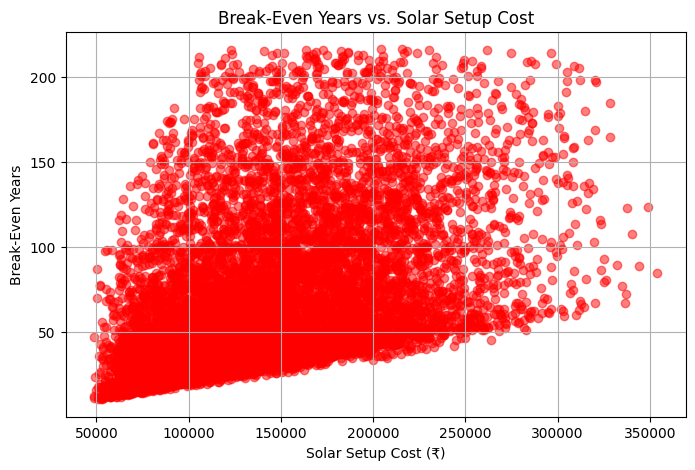

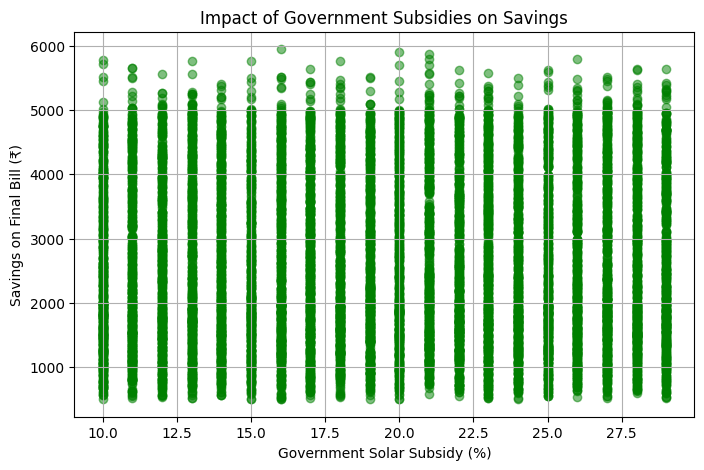

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Solar Generation vs. Monthly Consumption
plt.figure(figsize=(8, 5))
plt.scatter(df["Monthly_Consumption_kWh"], df["Solar_Generation_kWh"], alpha=0.5)
plt.xlabel("Monthly Energy Consumption (kWh)")
plt.ylabel("Solar Energy Generated (kWh)")
plt.title("Solar Energy Generation vs. Monthly Consumption")
plt.grid(True)
plt.show()

# 2️⃣ Impact of Household Size on Final Savings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Household_Size"], y=df["Final_Bill_After_Savings"])
plt.xlabel("Household Size")
plt.ylabel("Final Bill After Savings (₹)")
plt.title("Impact of Household Size on Solar Savings")
plt.grid(True)
plt.show()

# 3️⃣ Break-Even Years vs. Solar Setup Cost
plt.figure(figsize=(8, 5))
plt.scatter(df["Solar_Setup_Cost"], df["Break_Even_Years"], alpha=0.5, color="red")
plt.xlabel("Solar Setup Cost (₹)")
plt.ylabel("Break-Even Years")
plt.title("Break-Even Years vs. Solar Setup Cost")
plt.grid(True)
plt.show()

# 4️⃣ Effect of Government Subsidies on Savings
plt.figure(figsize=(8, 5))
plt.scatter(df["Govt_Solar_Subsidy_%"],
            df["Final_Bill_Before_Savings"] - df["Final_Bill_After_Savings"],
            alpha=0.5, color="green")
plt.xlabel("Government Solar Subsidy (%)")
plt.ylabel("Savings on Final Bill (₹)")
plt.title("Impact of Government Subsidies on Savings")
plt.grid(True)
plt.show()


In [30]:
features = [
    "Household_Size", "House_Area_sqft", "Monthly_Consumption_kWh",
    "Solar_Generation_kWh", "Energy_Sent_to_Grid_kWh", "Subsidy_Amount",
    "Avg_Sunlight_Hours_per_Day", "Electricity_Rate_per_kWh",
    "Net_Metering_Credit_per_kWh", "Govt_Solar_Subsidy_%", "Solar_Setup_Cost"
]


In [32]:
print(df.columns)  # Displays all correct column names


Index(['Unnamed: 0', 'Year', 'Household_Size', 'House_Area_sqft',
       'Monthly_Consumption_kWh', 'Solar_Generation_kWh',
       'Energy_Sent_to_Grid_kWh', 'Subsidy_Amount',
       'Final_Bill_Before_Savings', 'Final_Bill_After_Savings',
       'Avg_Sunlight_Hours_per_Day', 'Avg_Temperature_Celsius',
       'Cloud_Coverage_%', 'Electricity_Rate_per_kWh',
       'Net_Metering_Credit_per_kWh', 'Govt_Solar_Subsidy_%',
       'CO2_Emissions_Reduced_kg', 'Total_Annual_Emissions_Reduced',
       'Solar_Setup_Cost', 'Break_Even_Years', 'House_Ownership_Type',
       'Energy_Usage_Category', 'Household_Income'],
      dtype='object')


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define target variable
target = "Final_Bill_After_Savings"

# Split the dataset
X = df[features]  # Ensure df is loaded with the dataset
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
}

# Evaluate Models
model_performance = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    model_performance.append([name, mae, mse, rmse, r2])

# Convert results to DataFrame
model_results = pd.DataFrame(model_performance, columns=["Model", "MAE", "MSE", "RMSE", "R² Score"])

# Show results
print("\n🔹 Model Performance Comparison:")
print(model_results)



🔹 Model Performance Comparison:
               Model           MAE           MSE          RMSE  R² Score
0      Random Forest  6.548248e+01  1.013902e+04  1.006927e+02  0.998240
1      Decision Tree  4.029189e+02  2.580789e+05  5.080146e+02  0.955198
2  Linear Regression  2.590680e-12  9.992425e-24  3.161080e-12  1.000000
3            XGBoost  5.017896e+01  4.750610e+03  6.892467e+01  0.999175


In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


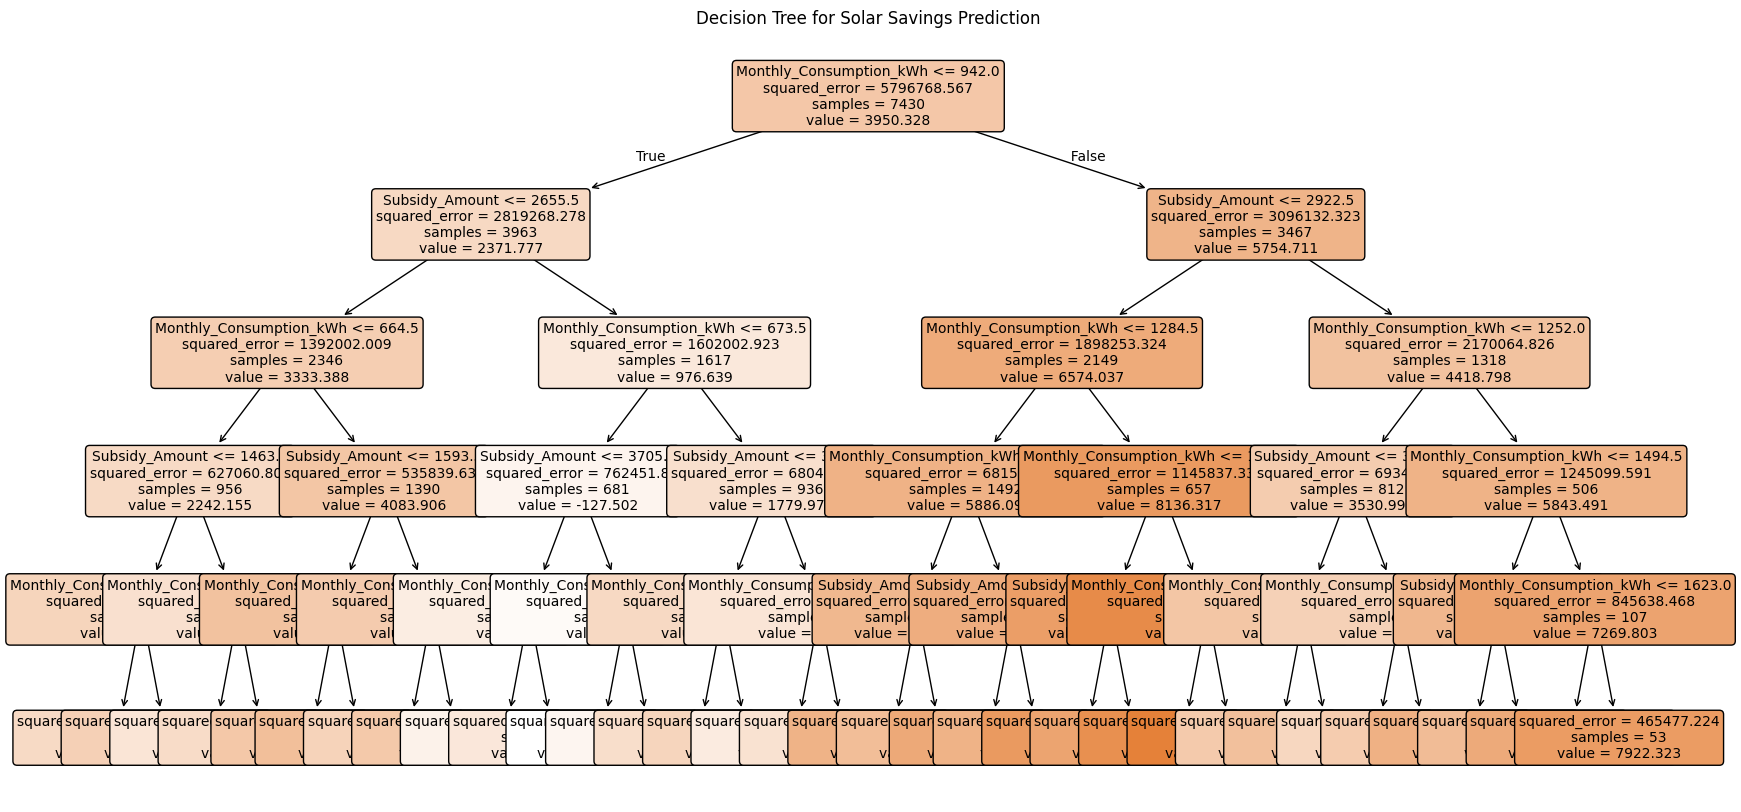

In [47]:
# Extract the trained Decision Tree model
dt_model = models["Decision Tree"]

# Set up figure size
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(dt_model, feature_names=features, filled=True, rounded=True, fontsize=10)

# Set title
plt.title("Decision Tree for Solar Savings Prediction")
plt.show()


In [52]:
import os
os.listdir("/content/")

['.config',
 'Cleaned_Solar_Energy_Dataset__Outliers_Removed_ (2).csv',
 'Cleaned_Solar_Energy_Dataset__Outliers_Removed_.csv',
 'Cleaned_Solar_Energy_Dataset__Outliers_Removed_ (1).csv',
 'sample_data']